<a href="https://colab.research.google.com/github/karielson/PPGEP9002_INTELIGENCIA_COMPUTACIONAL/blob/main/Classifica%C3%A7%C3%A3o_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


Downloads completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please upload the CSV file when prompted...


Saving Base_dados_textos_6_classes.csv to Base_dados_textos_6_classes (1).csv
Successfully loaded dataset with 319 rows
Starting text preprocessing...
Text preprocessing completed.

Class distribution:
Classe
4    60
1    55
2    55
0    53
3    51
5    45
Name: count, dtype: int64

Training set size: 255
Testing set size: 64

Performing TF-IDF vectorization...
Vocabulary size: 617

Training and evaluating models...

Processing Naive Bayes...
Naive Bayes completed.

Processing KNN...
KNN completed.

Processing SVM...
SVM completed.

Processing Decision Tree...
Decision Tree completed.

Processing Random Forest...
Random Forest completed.


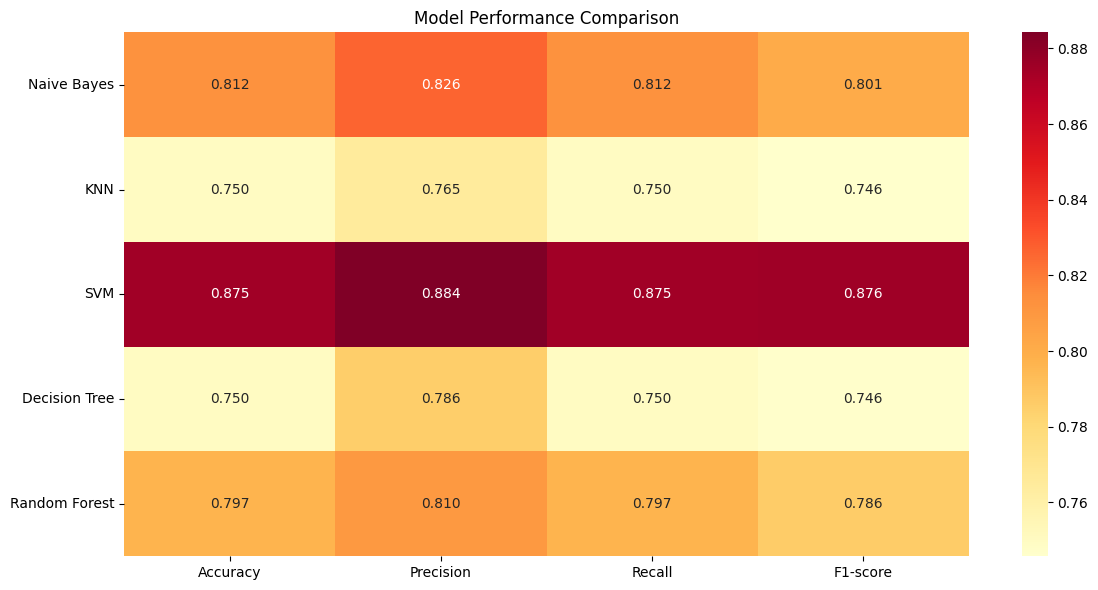


Detailed Results:
               Accuracy  Precision    Recall  F1-score
Naive Bayes    0.812500   0.825882  0.812500  0.801125
KNN            0.750000   0.764881  0.750000  0.745767
SVM            0.875000   0.884243  0.875000  0.875527
Decision Tree  0.750000   0.785518  0.750000  0.746387
Random Forest  0.796875   0.809521  0.796875  0.785961

Results saved to 'classification_results.csv'


In [ ]:
# Text Classification with Natural Language Processing
# UFRN - DEE - ELE 606 2024.2

import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download all required NLTK resources
print("Downloading required NLTK resources...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')  # Added this line for Portuguese stemmer
print("Downloads completed.")

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# File upload widget
from google.colab import files
print("Please upload the CSV file when prompted...")
uploaded = files.upload()

# Read the CSV file with error handling
try:
    df = pd.read_csv('Base_dados_textos_6_classes.csv', sep=';', encoding='latin1')
    print(f"Successfully loaded dataset with {len(df)} rows")
except Exception as e:
    print(f"Error loading CSV file: {str(e)}")
    raise

# Text preprocessing function with error handling
def preprocess_text(text):
    try:
        # Convert to lowercase
        text = str(text).lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-záàâãéèêíïóôõöúçñ\s]', '', text)

        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('portuguese'))
        tokens = [token for token in tokens if token not in stop_words]

        # Stemming
        stemmer = RSLPStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error preprocessing text: {str(e)}")
        return text  # Return original text if preprocessing fails

# Apply preprocessing to texts with progress tracking
print("Starting text preprocessing...")
df['processed_text'] = df['Texto Original'].apply(preprocess_text)
print("Text preprocessing completed.")

# Split features and target
X = df['processed_text']
y = df['Classe']

# Print class distribution
print("\nClass distribution:")
print(y.value_counts())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# TF-IDF Vectorization
print("\nPerforming TF-IDF vectorization...")
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Initialize classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models with progress tracking
results = {}
print("\nTraining and evaluating models...")
for name, clf in classifiers.items():
    print(f"\nProcessing {name}...")

    # Train model
    clf.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_tfidf)

    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }
    print(f"{name} completed.")

# Create results visualization
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(results).T, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
results_df = pd.DataFrame(results).T
print(results_df)

# Save results to CSV
results_df.to_csv('classification_results.csv')
print("\nResults saved to 'classification_results.csv'")